In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [4]:
df.shape

(545, 13)

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
df['mainroad']=le.fit_transform(df['mainroad'])
df['guestroom']=le.fit_transform(df['guestroom'])
df['basement']=le.fit_transform(df['basement'])
df['hotwaterheating']=le.fit_transform(df['hotwaterheating'])
df['airconditioning']=le.fit_transform(df['airconditioning'])
df['prefarea']=le.fit_transform(df['prefarea'])

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
status=pd.get_dummies(df['furnishingstatus'],drop_first=True)
df=pd.concat([df,status],axis=1)
df.drop('furnishingstatus',axis=1,inplace=True)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


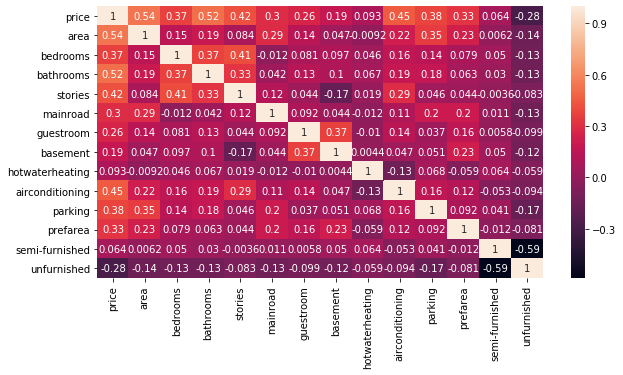

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

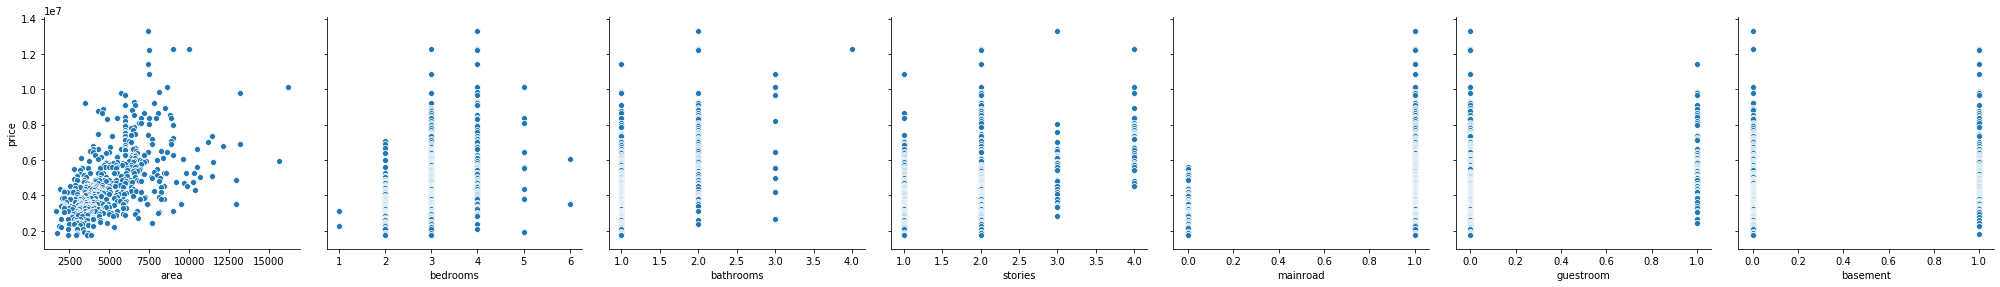

In [13]:
sns.pairplot(df,x_vars=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement'],y_vars='price',size=4,aspect=1,kind='scatter')

In [14]:
df.skew()

price              1.212239
area               1.321188
bedrooms           0.495684
bathrooms          1.589264
stories            1.082088
mainroad          -2.065410
guestroom          1.688419
basement           0.628590
hotwaterheating    4.353428
airconditioning    0.795748
parking            0.842062
prefarea           1.254361
semi-furnished     0.339635
unfurnished        0.741509
dtype: float64

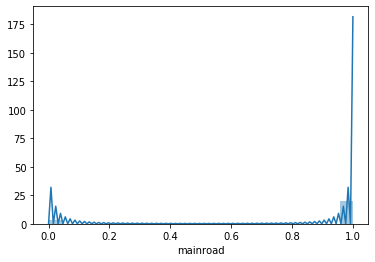

In [15]:
sns.distplot(df['mainroad'])

In [16]:
df[['mainroad','hotwaterheating']].describe([0.15,0.25,0.5,0.75,0.997])

,mainroad,hotwaterheating
count,545.000000,545.000000
mean,0.858716,0.045872
std,0.348635,0.209399
min,0.000000,0.000000
15%,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
99.7%,1.000000,1.000000
max,1.000000,1.000000


In [17]:
df1=df[(df['mainroad']>(np.mean(df['mainroad'])-(2.4*np.std(df['mainroad'])))) & (df['mainroad']<(np.mean(df['mainroad'])+2.1*np.std(df['mainroad'])))]
df1.shape                                                                                           

(468, 14)

In [18]:
df1.skew()

price              1.135361
area               1.277432
bedrooms           0.503806
bathrooms          1.539812
stories            1.023601
mainroad           0.000000
guestroom          1.566465
basement           0.589867
hotwaterheating    4.411047
airconditioning    0.699175
parking            0.698138
prefarea           1.043881
semi-furnished     0.330215
unfurnished        0.869010
dtype: float64

In [19]:
df2=df1[(df1['hotwaterheating']>(np.mean(df1['hotwaterheating'])-(3*np.std(df1['hotwaterheating'])))) & (df1['hotwaterheating']<(np.mean(df1['hotwaterheating'])+3*np.std(df1['hotwaterheating'])))]
df2.shape                                                                                           

(447, 14)

In [20]:
df2.skew()

price              1.186401
area               1.254918
bedrooms           0.500427
bathrooms          1.586147
stories            1.033865
mainroad           0.000000
guestroom          1.565997
basement           0.584488
hotwaterheating    0.000000
airconditioning    0.635750
parking            0.741052
prefarea           1.010258
semi-furnished     0.369759
unfurnished        0.819531
dtype: float64

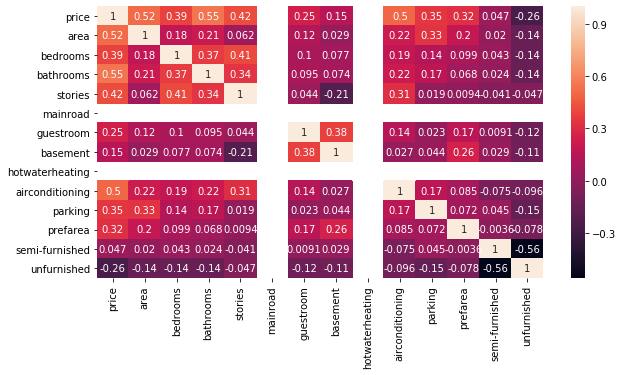

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),annot=True)

In [22]:
X=df2.drop('price',axis=1)
y=df2.price

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [25]:
X_train_sc=sc.fit_transform(X_train)

In [26]:
X_train_sc

array([[-0.6394989 ,  0.02204226, -0.59137702, ..., -0.61192266,
         1.21498579, -0.73276586],
       [-0.79601892,  0.02204226, -0.59137702, ..., -0.61192266,
        -0.82305489, -0.73276586],
       [-0.11417274,  0.02204226, -0.59137702, ..., -0.61192266,
         1.21498579, -0.73276586],
       ...,
       [-0.74681352,  0.02204226, -0.59137702, ..., -0.61192266,
        -0.82305489,  1.36469239],
       [ 0.51846805,  1.39747958,  1.33059829, ...,  1.63419345,
         1.21498579, -0.73276586],
       [ 3.51484225,  0.02204226, -0.59137702, ..., -0.61192266,
        -0.82305489,  1.36469239]])

In [27]:
X_train_sc_df=pd.DataFrame(X_train_sc,columns=X_train.columns)

In [28]:
X_test_sc=sc.fit_transform(X_test)

In [29]:
X_test_sc_df=pd.DataFrame(X_test_sc,columns=X_test.columns)

In [30]:
X_test_sc_df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.085803,0.149975,1.724831,0.095509,0.0,-0.488397,-0.803954,0.0,-0.718926,-0.851385,1.597696,1.169795,-0.534522
1,1.195414,0.149975,-0.535870,-0.978969,0.0,2.047513,1.243853,0.0,1.390965,0.264508,-0.625901,-0.854850,-0.534522
2,1.072650,-1.296214,-0.535870,-0.978969,0.0,-0.488397,-0.803954,0.0,-0.718926,0.264508,-0.625901,-0.854850,-0.534522
3,-0.817041,0.149975,1.724831,-0.978969,0.0,-0.488397,1.243853,0.0,1.390965,0.264508,-0.625901,-0.854850,-0.534522
4,-0.527668,-1.296214,-0.535870,-0.978969,0.0,-0.488397,1.243853,0.0,-0.718926,0.264508,-0.625901,1.169795,-0.534522


In [31]:
X_train_sc_df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,-0.639499,0.022042,-0.591377,1.307367,0.0,-0.48795,-0.727607,0.0,-0.737939,-0.834900,-0.611923,1.214986,-0.732766
1,-0.796019,0.022042,-0.591377,0.198947,0.0,-0.48795,1.374369,0.0,-0.737939,-0.834900,-0.611923,-0.823055,-0.732766
2,-0.114173,0.022042,-0.591377,1.307367,0.0,-0.48795,-0.727607,0.0,1.355125,-0.834900,-0.611923,1.214986,-0.732766
3,0.143570,0.022042,1.330598,2.415787,0.0,2.04939,-0.727607,0.0,1.355125,0.287896,1.634193,-0.823055,1.364692
4,-1.201378,0.022042,-0.591377,0.198947,0.0,-0.48795,-0.727607,0.0,-0.737939,-0.834900,1.634193,1.214986,-0.732766


In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
lr=LinearRegression()

In [34]:
rfe=RFE(lr,9)

In [35]:
rfe=rfe.fit(X_train_sc_df,y_train)

In [36]:
list(zip(X_train_sc_df.columns,rfe.support_,rfe.ranking_)) 

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 4),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', False, 5),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 2),
 ('unfurnished', True, 1)]

In [37]:
rfe.ranking_

array([1, 1, 1, 1, 4, 1, 3, 5, 1, 1, 1, 2, 1])

In [38]:
rfe.support_

array([ True,  True,  True,  True, False,  True, False, False,  True,
        True,  True, False,  True])

In [39]:
sec_col=X_train_sc_df.columns[rfe.support_]

In [40]:
X_train_sc_df_rfe=X_train_sc_df[sec_col]

In [41]:
X_train_sc_df_rfe.head()

,area,bedrooms,bathrooms,stories,guestroom,airconditioning,parking,prefarea,unfurnished
0,-0.639499,0.022042,-0.591377,1.307367,-0.48795,-0.737939,-0.834900,-0.611923,-0.732766
1,-0.796019,0.022042,-0.591377,0.198947,-0.48795,-0.737939,-0.834900,-0.611923,-0.732766
2,-0.114173,0.022042,-0.591377,1.307367,-0.48795,1.355125,-0.834900,-0.611923,-0.732766
3,0.143570,0.022042,1.330598,2.415787,2.04939,1.355125,0.287896,1.634193,1.364692
4,-1.201378,0.022042,-0.591377,0.198947,-0.48795,-0.737939,-0.834900,1.634193,-0.732766


## stats model

In [42]:
import statsmodels.api as sm

In [43]:
X_train_sc_df_rfe_sm=sm.add_constant(X_train_sc_df_rfe)

In [44]:
y_train=list(y_train) ### we need to convert into list and run all else endocs error comes


In [45]:
limod=sm.OLS(y_train,X_train_sc_df_rfe_sm).fit()

In [46]:
print(limod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     88.10
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           4.29e-79
Time:                        07:37:44   Log-Likelihood:                -4748.7
No. Observations:                 312   AIC:                             9517.
Df Residuals:                     302   BIC:                             9555.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.885e+06   5.67e+04     

In [47]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train_sc_df_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sc_df_rfe_sm.values,i) for i in range(X_train_sc_df_rfe_sm.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,bathrooms,1.37
4,stories,1.35
2,bedrooms,1.32
1,area,1.21
6,airconditioning,1.20
7,parking,1.13
8,prefarea,1.08
9,unfurnished,1.08
5,guestroom,1.06
0,const,1.00


In [48]:
X_train_sc_df_rfe_sm.drop('bedrooms',axis=1,inplace=True)

In [49]:
limod1=sm.OLS(y_train,X_train_sc_df_rfe_sm).fit()

In [50]:
print(limod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     98.29
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           1.48e-79
Time:                        07:37:45   Log-Likelihood:                -4750.0
No. Observations:                 312   AIC:                             9518.
Df Residuals:                     303   BIC:                             9552.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.885e+06   5.69e+04     

In [51]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train_sc_df_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sc_df_rfe_sm.values,i) for i in range(X_train_sc_df_rfe_sm.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,bathrooms,1.28
3,stories,1.24
1,area,1.21
5,airconditioning,1.20
6,parking,1.13
7,prefarea,1.07
8,unfurnished,1.07
4,guestroom,1.06
0,const,1.00


In [52]:
# ADD CONSTANT TO TEST DATA
X_test_sm=sm.add_constant(X_test_sc_df)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.0,1.085803,0.149975,1.724831,0.095509,0.0,-0.488397,-0.803954,0.0,-0.718926,-0.851385,1.597696,1.169795,-0.534522
1,1.0,1.195414,0.149975,-0.535870,-0.978969,0.0,2.047513,1.243853,0.0,1.390965,0.264508,-0.625901,-0.854850,-0.534522
2,1.0,1.072650,-1.296214,-0.535870,-0.978969,0.0,-0.488397,-0.803954,0.0,-0.718926,0.264508,-0.625901,-0.854850,-0.534522
3,1.0,-0.817041,0.149975,1.724831,-0.978969,0.0,-0.488397,1.243853,0.0,1.390965,0.264508,-0.625901,-0.854850,-0.534522
4,1.0,-0.527668,-1.296214,-0.535870,-0.978969,0.0,-0.488397,1.243853,0.0,-0.718926,0.264508,-0.625901,1.169795,-0.534522


In [53]:
# IT CHOOSE COLUMN FROM TRAINED DATA FOR TEST DATA ANAYSIS
X_test_sm=X_test_sm[X_train_sc_df_rfe_sm.columns]
X_test_sm.head()

,const,area,bathrooms,stories,guestroom,airconditioning,parking,prefarea,unfurnished
0,1.0,1.085803,1.724831,0.095509,-0.488397,-0.718926,-0.851385,1.597696,-0.534522
1,1.0,1.195414,-0.535870,-0.978969,2.047513,1.390965,0.264508,-0.625901,-0.534522
2,1.0,1.072650,-0.535870,-0.978969,-0.488397,-0.718926,0.264508,-0.625901,-0.534522
3,1.0,-0.817041,1.724831,-0.978969,-0.488397,1.390965,0.264508,-0.625901,-0.534522
4,1.0,-0.527668,-0.535870,-0.978969,-0.488397,-0.718926,0.264508,-0.625901,-0.534522


In [54]:
y_train_sm_pred=limod1.predict(X_train_sc_df_rfe_sm)

In [55]:
y_pred_test_sm=limod1.predict(X_test_sm)


In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_train,y_train_sm_pred)

0.721839815589142

In [58]:
r2_score(y_test,y_pred_test_sm)

0.5326026631669174

## linear

In [59]:
# from sklearn.linear_model import LinearRegression
# lr.fit(X_train_sc_df_rfe_sm,y_train)
# y_pred=lr.predict(X_test_sm)
# y_pred_train=lr.predict(X_train_sc_df_rfe_sm)#check/predect for train data output 

In [60]:
# r2_score(y_test,y_pred)

In [61]:
# r2_score(y_train,y_pred_train)

In [62]:
# from sklearn.linear_model import LinearRegression
# lr.fit(X_train_sc_df_rfe,y_train)
# y_pred=lr.predict(X_test)
# y_pred_train=lr.predict(X_train_sc_df_rfe)#check/predect for train data output 

In [63]:
# r2_score(y_test,y_pred)

In [64]:
# r2_score(y_train,y_pred_train)

In [65]:
from sklearn import metrics

In [73]:
from sklearn.linear_model import LinearRegression
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred_train=lr.predict(X_train)#check/predect for train data output 

In [74]:
r2_score(y_test,y_pred)

0.5370415703628413

In [75]:
r2_score(y_train,y_pred_train)

0.7243248986441448

In [69]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 897956.7999225559
MSE 1604973212511.0522
RMSE 1266875.3737092896
